In [2]:
# House Price Prediction Model
# -----------------------------
# This script implements a linear regression model to predict house prices.
# The model is trained on a small dataset (Housing.csv) with various features related to house characteristics.
# The target variable is the house price.
#
# Author: Sheheryar

In [3]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [4]:
# reading dataset

df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [34]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [36]:
# checking if there are any null values in the dataset

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

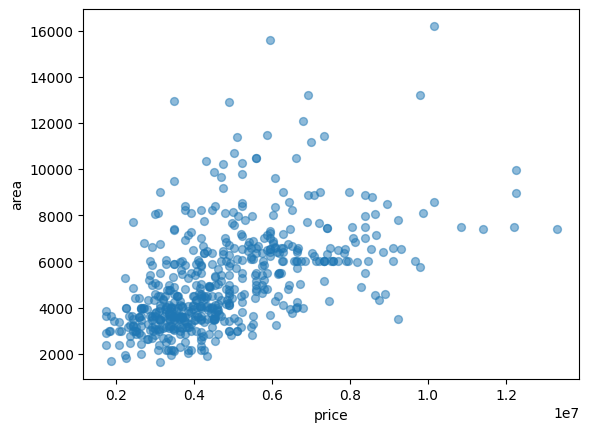

In [37]:
df.plot(kind = 'scatter', x = 'price', y = 'area', s = 32, alpha = 0.5)
plt.show()

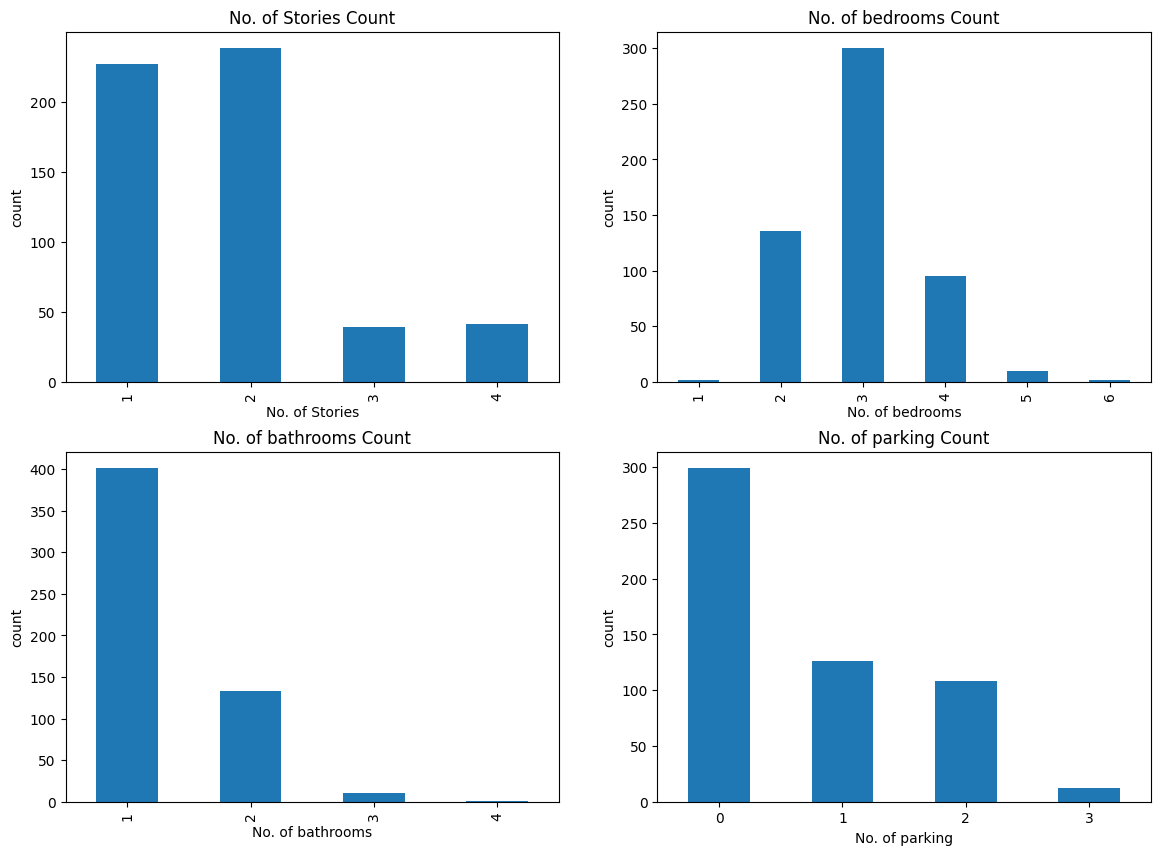

In [38]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))

# stories count

stories_cnt = df['stories'].value_counts()
stories_cnt = stories_cnt.sort_index()
stories_cnt.plot(kind = 'bar', ax = axes[0,0])
axes[0,0].set_title('No. of Stories Count')
axes[0,0].set_xlabel('No. of Stories')
axes[0,0].set_ylabel('count')

# bedrooms count

bedrooms_cnt = df['bedrooms'].value_counts()
bedrooms_cnt = bedrooms_cnt.sort_index()
bedrooms_cnt.plot(kind = 'bar', ax = axes[0,1])
axes[0,1].set_title('No. of bedrooms Count')
axes[0,1].set_xlabel('No. of bedrooms')
axes[0,1].set_ylabel('count')

# bathroom count
bathrooms_cnt = df['bathrooms'].value_counts()
bathrooms_cnt = bathrooms_cnt.sort_index()
bathrooms_cnt.plot(kind = 'bar', ax=axes[1,0])
axes[1,0].set_title('No. of bathrooms Count')
axes[1,0].set_xlabel('No. of bathrooms')
axes[1,0].set_ylabel('count')

# parking count
parking_cnt = df['parking'].value_counts()
parking_cnt = parking_cnt.sort_index()
parking_cnt.plot(kind = 'bar', ax=axes[1,1])
axes[1,1].set_title('No. of parking Count')
axes[1,1].set_xlabel('No. of parking')
axes[1,1].set_ylabel('count')

plt.xticks(rotation=0)
plt.show()


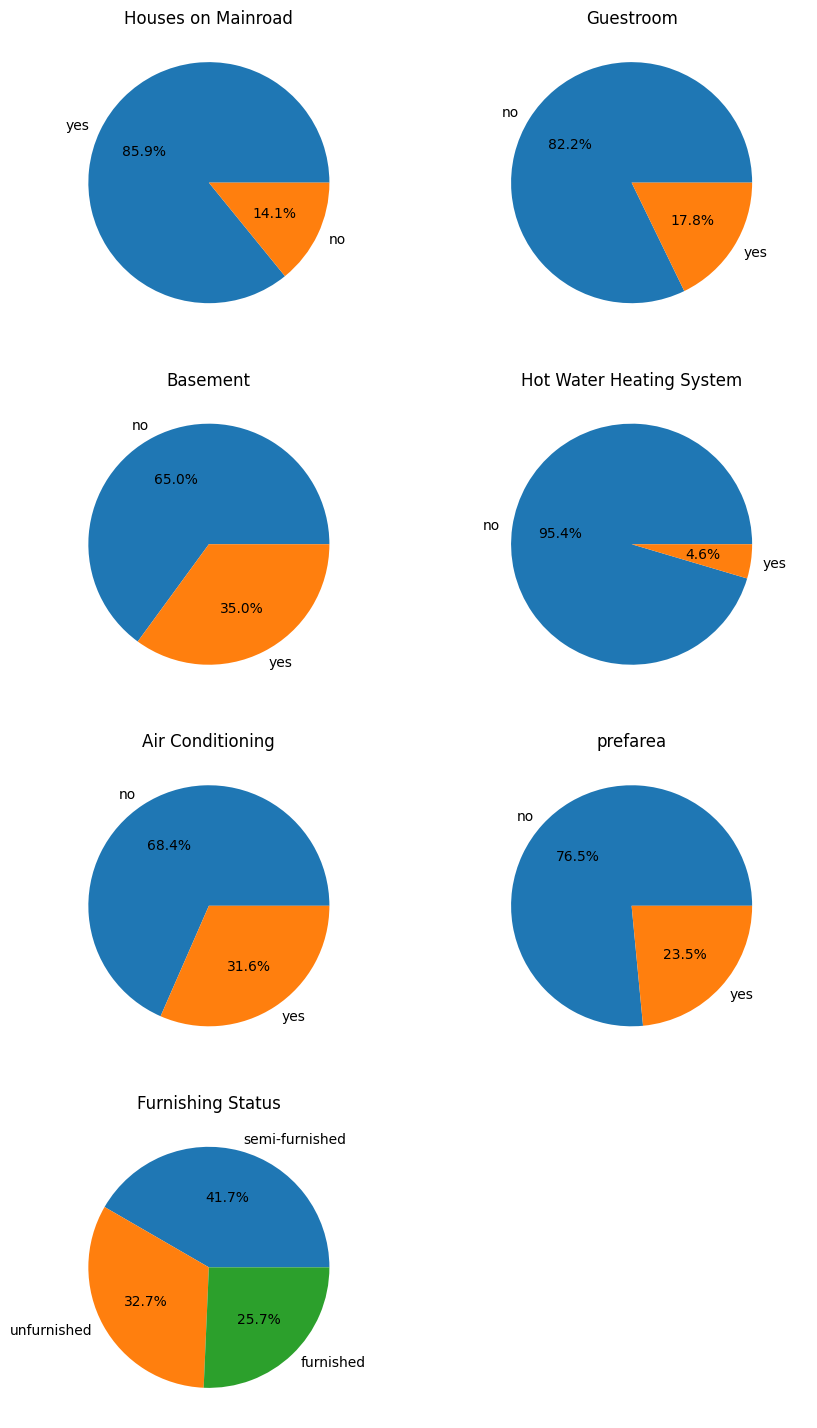

In [39]:
 fig,axes = plt.subplots(nrows=4, ncols=2,figsize=(10,18))

# mainroad count

mainroad_cnt = df['mainroad'].value_counts()
mainroad_cnt.plot(kind = 'pie', autopct = "%1.1f%%", ax=axes[0,0])
axes[0,0].set_title('Houses on Mainroad')
axes[0,0].set_ylabel('')

# guestroom count 

guestroom_cnt = df['guestroom'].value_counts()
guestroom_cnt.plot(kind = 'pie', autopct = "%1.1f%%", ax=axes[0,1])
axes[0,1].set_title('Guestroom')
axes[0,1].set_ylabel('')

# basement count

basement_cnt = df['basement'].value_counts()
basement_cnt.plot(kind = 'pie', autopct = "%1.1f%%", ax = axes[1,0])
axes[1,0].set_title('Basement')
axes[1,0].set_ylabel('')

# hotwaterheating

hotwaterheating_cnt = df['hotwaterheating'].value_counts()
hotwaterheating_cnt.plot(kind = 'pie', autopct = "%1.1f%%", ax=axes[1,1])
axes[1,1].set_title('Hot Water Heating System')
axes[1,1].set_ylabel('')

# Air Conditioning

airconditioning_cnt = df['airconditioning'].value_counts()
airconditioning_cnt.plot(kind = 'pie', autopct = "%1.1f%%", ax=axes[2,0])
axes[2,0].set_title('Air Conditioning')
axes[2,0].set_ylabel('')

# prefarea

prefarea_cnt = df['prefarea'].value_counts()
prefarea_cnt.plot(kind = 'pie', autopct = "%1.1f%%", ax=axes[2,1])
axes[2,1].set_title('prefarea')
axes[2,1].set_ylabel('')

# Furnsihing Status
furnishingstatus_cnt = df['furnishingstatus'].value_counts()
furnishingstatus_cnt.plot(kind = 'pie', autopct = "%1.1f%%", ax=axes[3,0])
axes[3,0].set_title('Furnishing Status')
axes[3,0].set_ylabel('')

axes[3,1].axis('off')

plt.show()


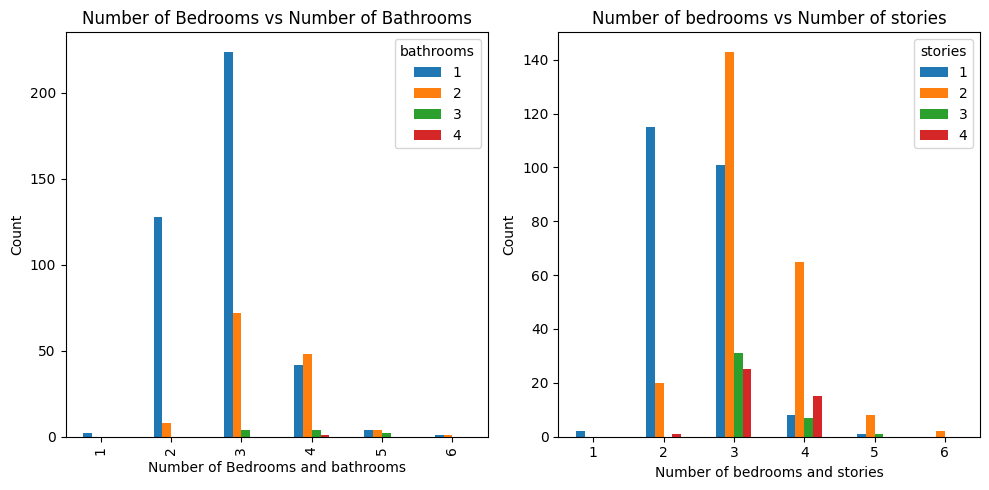

In [40]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# comparing Number of bedrooms and bathroom

bed_bath = pd.crosstab(df['bedrooms'], df['bathrooms'])
bed_bath.plot(kind = 'bar', ax=axes[0])
axes[0].set_title('Number of Bedrooms vs Number of Bathrooms')
axes[0].set_xlabel('Number of Bedrooms and bathrooms')
axes[0].set_ylabel('Count')

# comparing Numbers of bedrooms and Stories

bed_stories = pd.crosstab(df['bedrooms'], df['stories'])
bed_stories.plot(kind = 'bar', ax=axes[1])
axes[1].set_title('Number of bedrooms vs Number of stories')
axes[1].set_xlabel('Number of bedrooms and stories')
axes[1].set_ylabel('Count')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


In [41]:
# encoding string values

encoder = LabelEncoder()

encoding_col = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [42]:
# defining x and y for linear regression ( y = mx + c )

x = df.drop(columns=['price'], axis = 1)
y = df['price']

# initialize MinMaxScaler
scaler = MinMaxScaler()

# transform x and y to scale its value between 0 and 1

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [43]:
# splitting dataset for testing (20%) and training (80%)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 32)

In [44]:
# Using Linear Regression model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
# testing the model

y_pred = model.predict(x_test)

In [46]:
# Computing the error and accuracy of the trained model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
acc = r2_score(y_test, y_pred)

print('Mean Absolute Error = ', mae, '\nMean Squared Error = ', mse, '\nAccuracy / R2 score = ', acc)


Mean Absolute Error =  0.06533228224872108 
Mean Squared Error =  0.007717459305885652 
Accuracy / R2 score =  0.6971159279858342
